In [30]:
# !git clone https://github.com/Arman-Rayan-Sharif/arman-text-emotion.git

In [31]:
!pip install --quiet parsivar

DEPRECATION: Loading egg at c:\users\user\appdata\local\programs\python\python311\lib\site-packages\protonets-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import csv
import codecs
import pandas as pd
import seaborn as sns

In [64]:
# covert to csv
def covert_to_csv(file_path,output_file_path):
    with codecs.open(file_path, 'r', encoding='utf-8-sig') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        rows = list(reader)

    header = ['text', 'label']
    rows.insert(0, header)

    with open(output_file_path, 'w', encoding='utf-8-sig', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerows(rows)

In [65]:
covert_to_csv(r'../dataset_arman-text-emotion/dataset/train.tsv',r'../dataset_arman-text-emotion/dataset/train.csv')

covert_to_csv(r'../dataset_arman-text-emotion/dataset/test.tsv',r'../dataset_arman-text-emotion/dataset/test.csv')

In [35]:
df = pd.read_csv(r'../dataset_arman-text-emotion/dataset/train.csv')

In [36]:
df.head()

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD


In [37]:
df['label'].value_counts()

label
OTHER       1681
ANGRY        923
SAD          896
FEAR         757
SURPRISE     739
HAPPY        618
HATE         511
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

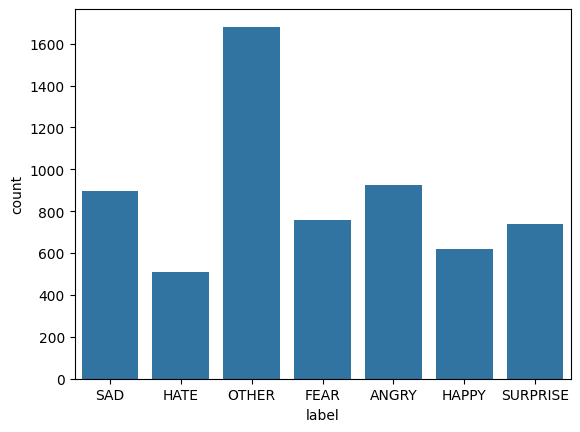

In [38]:
sns.countplot(x='label',data=df)

<h2>Preprocess Text</h2>

In [39]:
from parsivar import Normalizer
import re
import copy
import csv
from openpyxl import Workbook

In [40]:
# 1.remove English letter
def removeEnglishLetter(text):
    RemoveEnglish_text = re.sub(r'[A-Za-z]', '', text)
    return RemoveEnglish_text

In [41]:
# 2.remove repeated more than twice in the non-standard spelling
def removeDuplicateCharacters(text_org):
    text:str=copy.deepcopy(text_org)
    last=text[0]
    counter=1
    i=1
    while i<len(text):
        current=text[i]
        if current==last:
            counter+=1
        else:
            last=current
            if counter>=3:
                text=text[:i-counter]+text[i-1:]
                i-=counter-1
            counter=1
        i+=1
    if counter>=3:
        text=text[:i-counter]+text[i-1:]
        i-=counter-1
        counter=1
    return text

In [42]:
# 3.Remove Arabic diacritics
def RemoveArabic(text):
    removearabic = re.sub(r'[\u064B-\u065F]', '', text)
    return removearabic

In [43]:
# 4.Remove remaining non-Persian characters
# def Removenonpersian(text):
#     nonpersian_text = re.sub(r'[^\u0600-\u06FF\uFB8A\u067E\u0686\u06AF\u200C]', '',text)
#     return nonpersian_text

In [44]:
# 5.Remove hashtag sign while keeping the information included in hashtags
def unTag(text):
    removehashtag_text = re.sub(r'#', '', text)
    removehashtag_text = re.sub(r'_', ' ', removehashtag_text)
    return removehashtag_text

In [45]:
# 6.Remove Persian numeric characters
def RemovePersiannumber(text):
    RemovePersian_text = re.sub(r'[۰-۹]', '', text)
    return RemovePersian_text

In [46]:
# 7.Parsivar Normalizer
def normalize_text(text):
    normalizer = Normalizer()
    normalized_text = normalizer.normalize(text)
    return normalized_text

In [47]:
df = pd.read_csv(r'../dataset_arman-text-emotion/dataset/train.csv')
df['text_clean'] = df['text'].apply(removeEnglishLetter)\
                            .apply(removeDuplicateCharacters)\
                            .apply(RemoveArabic)\
                            .apply(unTag)\
                            .apply(RemovePersiannumber)\
                            .apply(normalize_text)

df['text'] = df['text_clean']
df.drop('text_clean', axis=1, inplace=True)

In [48]:
df.head()

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,""" کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت‌شده‌، ایا میشه اعتراض زد...,OTHER
4,این وضع ب طرز خنده‌داری گریه داره .,SAD


In [49]:
def preprocess_csv(input_file, output_file):
    df = pd.read_csv(input_file)
    df['text_clean'] = df['text'].apply(removeEnglishLetter)\
                                .apply(removeDuplicateCharacters)\
                                .apply(RemoveArabic)\
                                .apply(unTag)\
                                .apply(RemovePersiannumber)\
                                .apply(normalize_text)
    df['text'] = df['text_clean']
    df.drop('text_clean', axis=1, inplace=True)
    df.to_csv(output_file, index=False, encoding='utf-8-sig')

In [55]:
preprocess_csv(r'../dataset_arman-text-emotion/dataset/train.csv', r'../dataset_arman-text-emotion/dataset/train_clean.csv')

In [53]:
preprocess_csv(r'../dataset_arman-text-emotion/dataset/test.csv', r'../dataset_arman-text-emotion/dataset/test_clean.csv')